# Exercitiul #2
Vom implementa un model de regresie care prezice coordonatele unui obiect in spatiu 3D in functie de timp. Vom avea un singur feature si 3 label-uri.

Am ales o functie f(t), in care coordonatele unui obiect depind de timp in rumatorul mod:
$$
f(t) = (\frac{tsin(t)}{e^\frac{t}{10}}, \quad (t+1)\sqrt{cos(t) + 1}, \quad (2t-sin(t))cos(\frac{t}{3}))
$$

In [1]:
import math
import csv
%matplotlib ipympl

In [2]:
def f1(x):
    return (x * math.sin(x)) / math.exp(x/10)

def f2(x):
    return (x+1)*(math.sqrt(math.cos(x)+1))

def f3(x):
    return (2*x - math.sin(x)) * (math.cos(x/3))

In [3]:
xval = [i * 0.05 for i in range(20, int(100 / 0.05) + 1)] 
results = [(x, f1(x), f2(x), f3(x)) for x in xval]

In [4]:
with open("data.csv", mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(results)

print("Data generated.")

Data generated.


^ Pana acum doar am generat datele pentru model. Acum vom presupune ca nu mai stim cum au fost generate, si vom incerca sa antrenam modelul incat sa le prezica.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2024-07-11 16:55:32.611828: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
columns = ["t", "x", "y", "z"]

rawDataset = pd.read_csv("./data.csv", names=columns, sep=",")
dataset = rawDataset.copy()
dataset.head()

,t,x,y,z
0,1.00,0.761394,2.482178,1.094760
1,1.05,0.820011,2.508693,1.157849
2,1.10,0.878211,2.531869,1.221794
3,1.15,0.935648,2.551614,1.286555
4,1.20,0.991973,2.567842,1.352082


In [7]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
t,1981.0,50.500000,28.600488,1.000000,25.750000,50.500000,75.250000,100.000000
x,1981.0,-0.000692,1.123293,-3.661546,-0.140643,-0.000310,0.164900,3.581578
y,1981.0,46.101670,36.012885,0.024671,15.223875,37.437754,71.490395,137.831473
z,1981.0,5.415001,80.657291,-169.879976,-48.003630,1.442320,58.735639,188.519239


In [8]:
for column in columns:
    dataset[column] = pd.to_numeric(dataset[column])
    dataset[column] = (dataset[column] - dataset[column].min()) / (dataset[column].max() - dataset[column].min())

dataset.tail()

,t,x,y,z
1976,0.997980,0.505094,0.965937,0.319604
1977,0.998485,0.505120,0.975360,0.310625
1978,0.998990,0.505147,0.984183,0.301687
1979,0.999495,0.505175,0.992398,0.292792
1980,1.000000,0.505203,1.000000,0.283945


In [9]:
trainSet = dataset.sample(frac=0.8)
testSet = dataset.drop(trainSet.index)

In [10]:
trainFeatures = trainSet["t"]
testFeatures = testSet["t"]
trainLabels = trainSet.copy()
trainLabels.pop("t")
testLabels = testSet.copy()
testLabels.pop("t")

6       0.003030
10      0.005051
14      0.007071
19      0.009596
24      0.012121
          ...   
1955    0.987374
1960    0.989899
1964    0.991919
1965    0.992424
1968    0.993939
Name: t, Length: 396, dtype: float64

In [11]:
trainFeatures.head()

1954    0.986869
66      0.033333
1435    0.724747
743     0.375253
1794    0.906061
Name: t, dtype: float64

In [12]:
trainLabels.head()

,x,y,z
1954,0.504839,0.623337,0.521936
66,0.151710,0.029592,0.477635
1435,0.502226,0.184635,0.732642
743,0.556101,0.391423,0.683285
1794,0.506090,0.189631,0.665166


In [13]:
model = tf.keras.Sequential([
    layers.Flatten(input_shape=(1,)),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(3)
])

2024-07-11 16:55:48.779069: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [14]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss="mean_absolute_error",
)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1)                 0         
                                                                 
 dense (Dense)               (None, 256)               512       
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 128)               3

In [16]:
%%time
history = model.fit(
    trainFeatures, trainLabels,
    validation_split = 0.2,
    epochs = 400
)

Epoch 1/400
40/40 [==============================] - 5s 33ms/step - loss: 0.2125 - val_loss: 0.1543
Epoch 2/400
40/40 [==============================] - 0s 11ms/step - loss: 0.1457 - val_loss: 0.1393
Epoch 3/400
40/40 [==============================] - 1s 16ms/step - loss: 0.1385 - val_loss: 0.1403
Epoch 4/400
40/40 [==============================] - 1s 13ms/step - loss: 0.1382 - val_loss: 0.1408
Epoch 5/400
40/40 [==============================] - 1s 15ms/step - loss: 0.1387 - val_loss: 0.1402
Epoch 6/400
40/40 [==============================] - 1s 14ms/step - loss: 0.1377 - val_loss: 0.1372
Epoch 7/400
40/40 [==============================] - 1s 16ms/step - loss: 0.1373 - val_loss: 0.1381
Epoch 8/400
40/40 [==============================] - 1s 16ms/step - loss: 0.1359 - val_loss: 0.1394
Epoch 9/400
40/40 [==============================] - 1s 13ms/step - loss: 0.1357 - val_loss: 0.1355
Epoch 10/400
40/40 [==============================] - 1s 13ms/step - loss: 0.1356 - val_loss: 0.1386

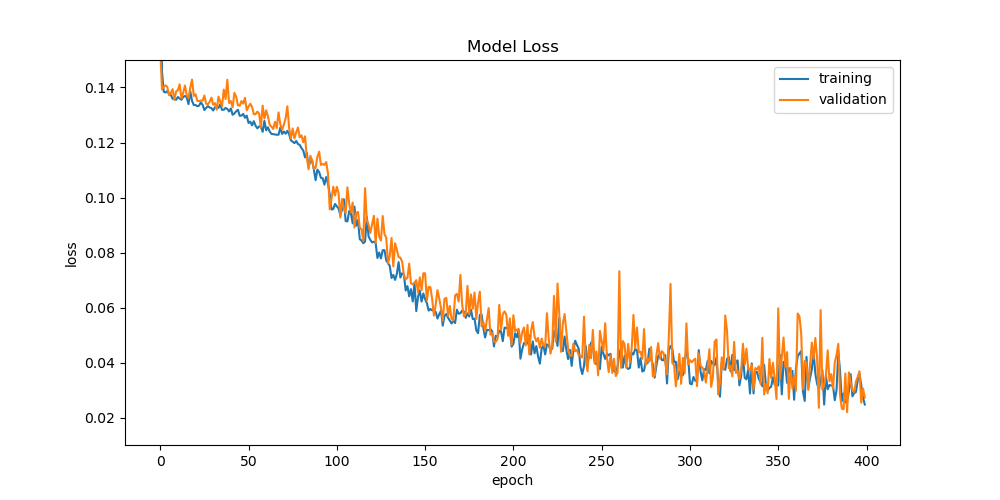

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["training", "validation"])
plt.ylim(0.01, 0.150)
plt.show()

In [18]:
evaluation = model.evaluate(testFeatures, testLabels, verbose=2)
predictions = model.predict(testFeatures)
print(evaluation)
print(predictions)

13/13 - 0s - loss: 0.0280 - 175ms/epoch - 13ms/step
13/13 [==============================] - 0s 6ms/step
0.027990104630589485
[[0.6824656  0.02315983 0.46985087]
 [0.6821122  0.02317232 0.46976095]
 [0.6817589  0.0231848  0.469671  ]
 ...
 [0.52268744 0.9211446  0.37750822]
 [0.52277833 0.9327399  0.37133878]
 [0.5230739  0.9552819  0.35685933]]


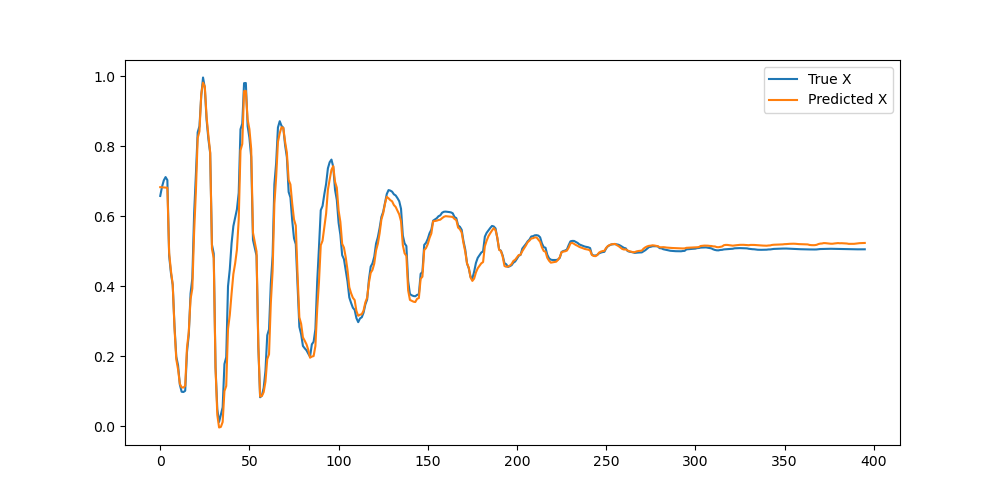

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(testLabels.values[:, 0], label='True X')
plt.plot(predictions[:, 0], label='Predicted X')
plt.legend()
plt.show()


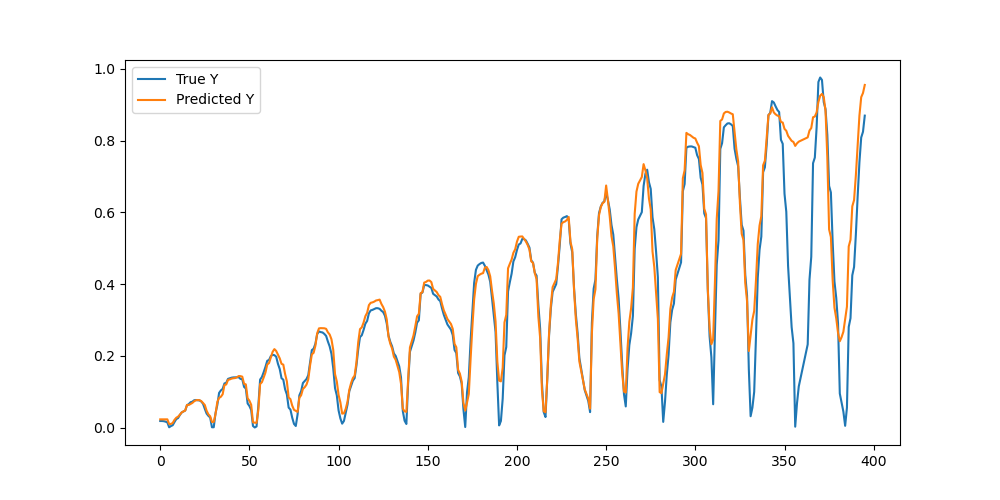

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(testLabels.values[:, 1], label='True Y')
plt.plot(predictions[:, 1], label='Predicted Y')
plt.legend()
plt.show()


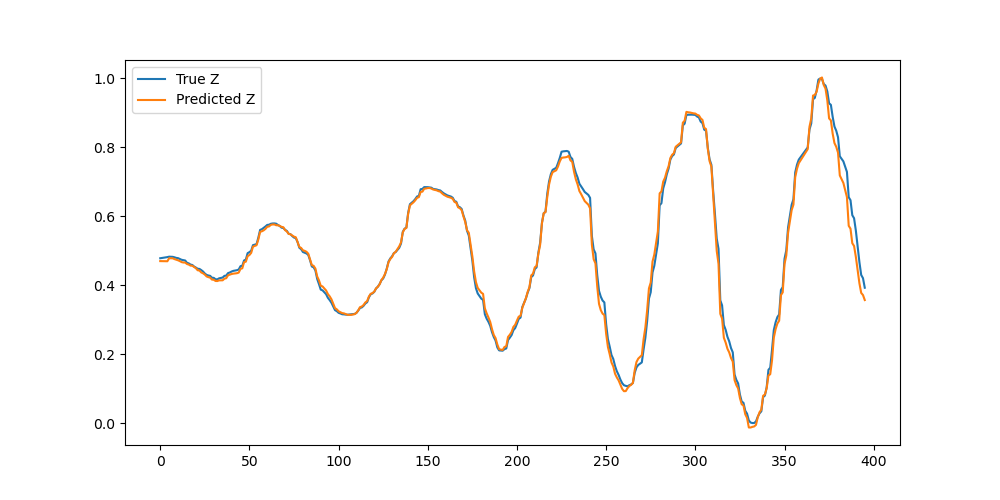

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(testLabels.values[:, 2], label='True Z')
plt.plot(predictions[:, 2], label='Predicted Z')
plt.legend()
plt.show()

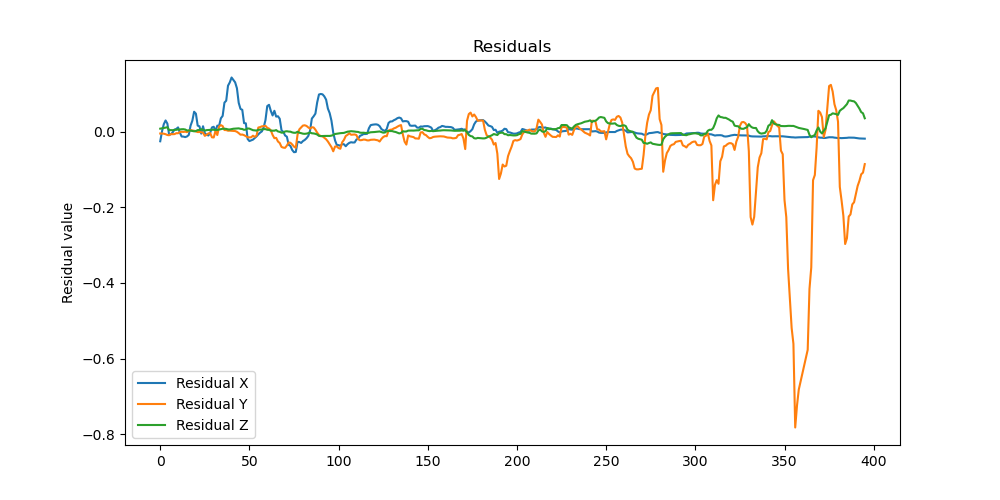

In [22]:
residuals = testLabels.values - predictions

plt.figure(figsize=(10, 5))
plt.plot(residuals[:, 0], label='Residual X')
plt.plot(residuals[:, 1], label='Residual Y')
plt.plot(residuals[:, 2], label='Residual Z')
plt.legend()
plt.title("Residuals")
plt.ylabel("Residual value")
plt.show()


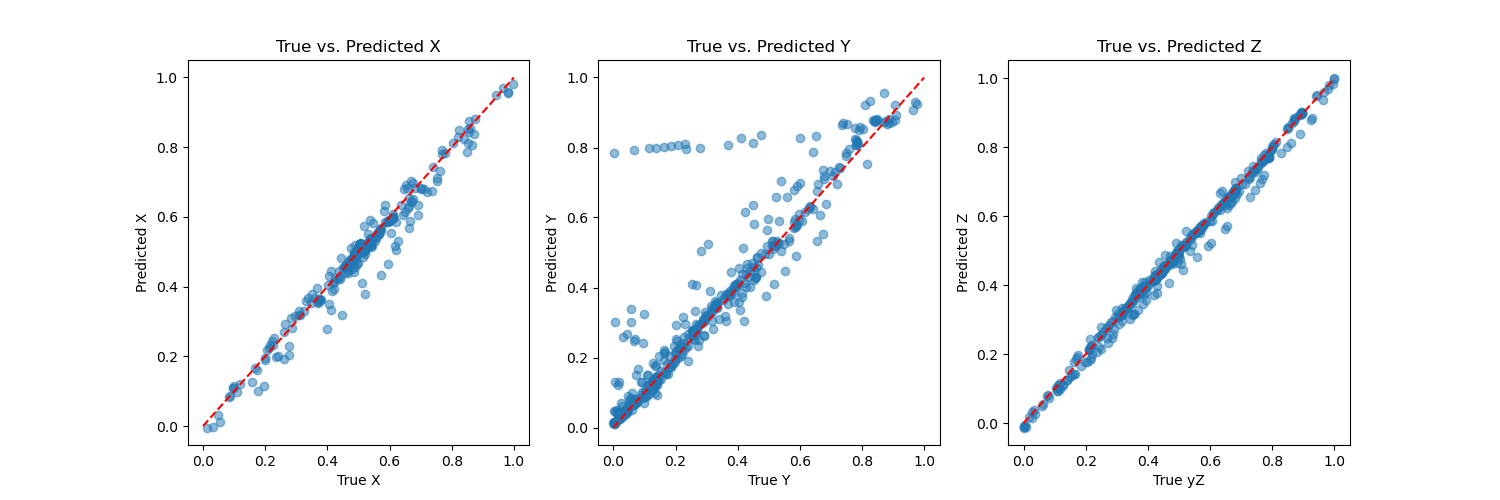

In [23]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(testLabels.values[:, 0], predictions[:, 0], alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('True X')
plt.ylabel('Predicted X')
plt.title('True vs. Predicted X')

plt.subplot(1, 3, 2)
plt.scatter(testLabels.values[:, 1], predictions[:, 1], alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('True Y')
plt.ylabel('Predicted Y')
plt.title('True vs. Predicted Y')

plt.subplot(1, 3, 3)
plt.scatter(testLabels.values[:, 2], predictions[:, 2], alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('True yZ')
plt.ylabel('Predicted Z')
plt.title('True vs. Predicted Z')

plt.show()


In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


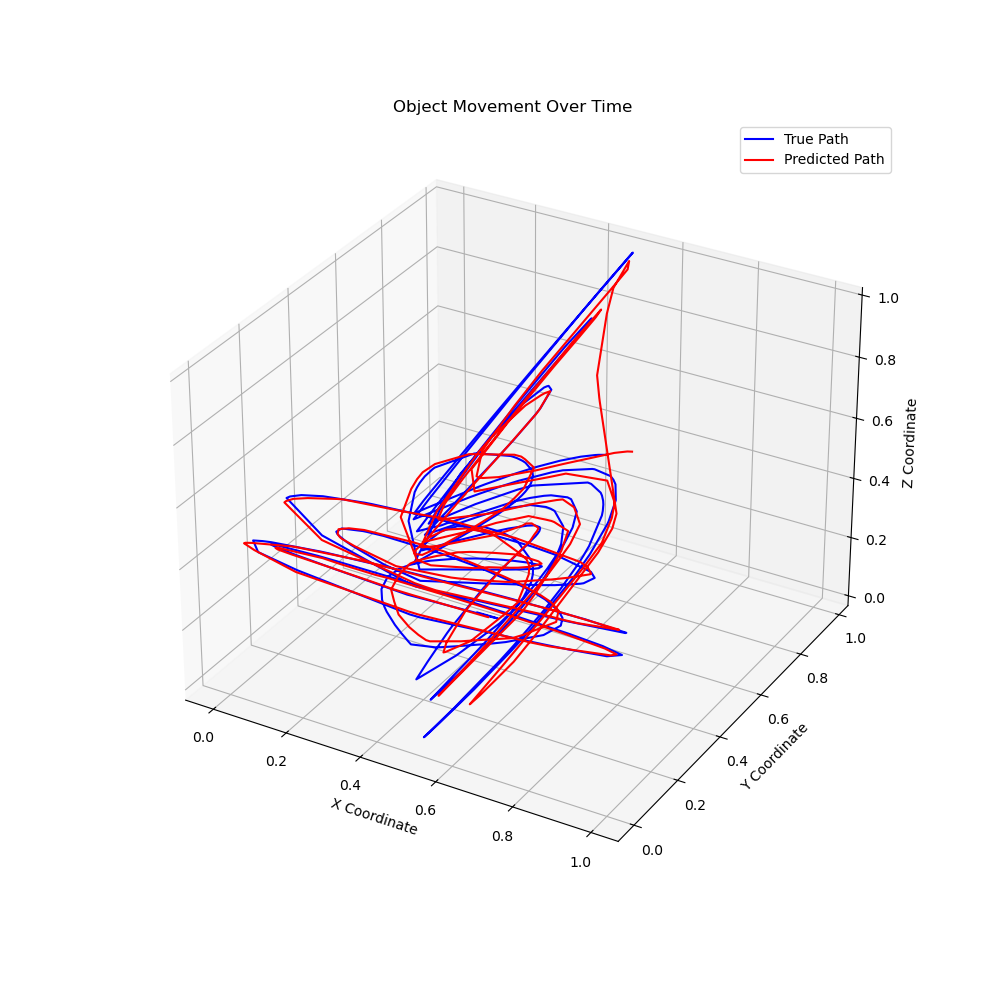

In [25]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot(testLabels.values[:, 0], testLabels.values[:, 1], testLabels.values[:, 2], label='True Path', color='blue')

ax.plot(predictions[:, 0], predictions[:, 1], predictions[:, 2], label='Predicted Path', color='red')

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')
ax.set_title('Object Movement Over Time')
ax.legend()

plt.show()